# Exploratory Data Analysis

Exploratory Data Analysis is a first step in any ML project which involves understanding the data and problem statement clearly. There is this saying, "it is a crucial to know your data before using it".

**Problem statement:** `to predict the duration of a ride`

**data source:** https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**data file:** 2023 Jan and Feb Yellow Taxi Trip Records 

## Data Loading

Let's first download the data.
- Jan 2023 data download url: https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
- Feb 2023 data download url: https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

In [1]:
jan_data = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
feb_data = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"

In [3]:
!pip install pandas

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 8.4 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [4]:
import pandas as pd

In [5]:
# we need to explicitly install 'pyarrow' library to use read_parquet() method in pandas
!pip install pyarrow -q

Since it is a parquet data we are going to use pandas to download and load it into our notebook.

***Note: `Parquet` data are smaller and have much faster read and write speed comparative to `csv` file.***

In [78]:
jan_dataset = pd.read_parquet(jan_data)
feb_dataset = pd.read_parquet(feb_data)

In [7]:
# casual checking the dataset to ensure that it has been downloaded and loaded successfully
jan_dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [79]:
feb_dataset.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


## Q1. How many columns are there in the January dataset ?
Let's answer the first question

In [9]:
print("Total columns in the jan dataset: ", len(jan_dataset.columns))

Total columns in the jan dataset:  19


In [10]:
jan_dataset.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

## Compute duration column

In [11]:
jan_dataset.tpep_pickup_datetime[:10]

0   2023-01-01 00:32:10
1   2023-01-01 00:55:08
2   2023-01-01 00:25:04
3   2023-01-01 00:03:48
4   2023-01-01 00:10:29
5   2023-01-01 00:50:34
6   2023-01-01 00:09:22
7   2023-01-01 00:27:12
8   2023-01-01 00:21:44
9   2023-01-01 00:39:42
Name: tpep_pickup_datetime, dtype: datetime64[us]

let's calculate duration from pickup and dropoff datetime

In [12]:
jan_dataset.tpep_dropoff_datetime - jan_dataset.tpep_pickup_datetime

0         0 days 00:08:26
1         0 days 00:06:19
2         0 days 00:12:45
3         0 days 00:09:37
4         0 days 00:10:50
                ...      
3066761   0 days 00:13:59
3066762   0 days 00:19:27
3066763   0 days 00:24:31
3066764   0 days 00:13:00
3066765   0 days 00:14:24
Length: 3066766, dtype: timedelta64[us]

Since it is in a timedelta64 datatype, we cannot use it as it is in the ML model training. So let's convert it into minutes

In [13]:
duration = jan_dataset.tpep_dropoff_datetime - jan_dataset.tpep_pickup_datetime

In [14]:
duration.iloc[0]

Timedelta('0 days 00:08:26')

In [15]:
duration.iloc[0].seconds / 60

8.433333333333334

In [16]:
duration_in_min = duration.apply(lambda x: x.seconds / 60)
duration_in_min

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Length: 3066766, dtype: float64

In [17]:
jan_dataset["duration"] = duration_in_min

In [18]:
jan_dataset.duration.describe()

count    3.066766e+06
mean     1.565303e+01
std      4.162919e+01
min      0.000000e+00
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.439800e+03
Name: duration, dtype: float64

It says that the min duration time is 0 and max is 1439.8 min which is approx 24 hrs. So we can clearly say that it is an outlier. 
Let's do more details analysis.

In [19]:
jan_dataset.duration.std()

41.62919110966266

### Q2. What's the standard deviation of the trips duration in January?

The standard deviation of the trips during in january is **41.63**

## Drop outliers

In [23]:
!pip install seaborn
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 867.6 kB/s eta 0:00:001m883.1 kB/s eta 0:00:01
  Using cached kiwisolver-1.4.5-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.6 MB/s eta 0:00:003.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 9.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 7.3 MB/s eta 0:00:009.2 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.2 MB/s eta 0:00:00m eta 0:00:010:01:01m
Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
Using cached kiwisolver-1.4.5-cp39-cp39-manylinux_2_12_x86_64.manylinux

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

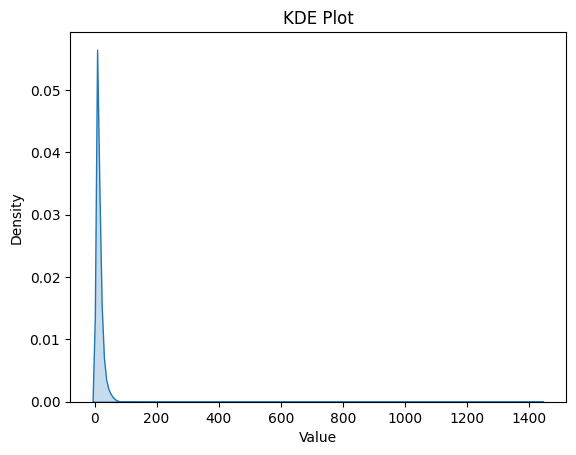

In [25]:
sns.kdeplot(jan_dataset.duration, fill=True)

# Display the plot
plt.title('KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [26]:
jan_dataset.duration.describe(percentiles=[0.75, 0.90, 0.95, 0.98])

count    3.066766e+06
mean     1.565303e+01
std      4.162919e+01
min      0.000000e+00
50%      1.151667e+01
75%      1.830000e+01
90%      2.794167e+01
95%      3.646667e+01
98%      4.873333e+01
max      1.439800e+03
Name: duration, dtype: float64

After observing the percentiles, we can say that
- about 75% of data has duration that are equals to or less than 18.3
- about 90% of data has duration that are equals to or less than 27.94
and so on.

Let's remove the outliers

In [27]:
# we could have used IQR to removing outliers but here we are following the homowork instruction 
lower_bound = 1
upper_bound = 60

In [28]:
propertion_of_dataset_after_dropped = ((jan_dataset.duration >= lower_bound) & (jan_dataset.duration <= upper_bound)).mean()

In [29]:
print("Propertions of data after dropping: ", propertion_of_dataset_after_dropped)

Propertions of data after dropping:  0.9812212604417814


In [30]:
jan_dataset = jan_dataset[((jan_dataset.duration >= lower_bound) & (jan_dataset.duration <= upper_bound))]

### Q3. What fraction of the records left after you dropped the outliers?

There are 98% of the records left after we dropped the outliers.

## One-Hot Encoding

Now, let's apply one-hot encoding in both pick and dropout location IDS, we are going to use only these two categorical variable for the model building.

Let's see how many unique values are there in the pickup and dropout IDS columns

In [31]:
jan_dataset.PULocationID.unique()

array([161,  43,  48, 138, 107, 239, 142, 164, 141, 234,  79,  33,  90,
       113, 237, 143, 137, 132, 163,  68, 263, 170, 233, 236, 144, 229,
       249, 162, 224, 151, 211, 148, 238, 231,  13, 262, 264, 125, 186,
       158, 246,  50,   4,  87, 114,  24, 166,  41,  25,  74, 140, 146,
        65, 181, 255, 256,  88, 232, 193, 226,  97,  37,  75, 189, 261,
       225, 244,  45,  40, 116,  80, 209, 243,  60, 100,  70, 188,  52,
         7, 159,  66,  42, 215, 252, 136, 223,  93,  12,  39, 195,  61,
       112, 230,  82, 106, 228, 197, 179, 260, 152, 121,  49, 198,  83,
       119, 145, 129, 265,  36,  34,  17, 160, 196, 168, 102,  28,  95,
        54,  77, 240,  32, 218, 219, 133,  89, 177, 247, 173,  69,  14,
        51, 165, 254, 235, 127, 131, 191, 157, 182, 241,  11,  62, 258,
       169, 123,  47,  10, 135, 216, 194, 155,  22,  94, 108,  92,  63,
        44, 259, 124,  78, 171,  55, 180,  35,  81, 122, 257, 139,  72,
        71,  19, 130, 200, 222, 208,  76, 210,  15, 147,  85,  9

In [32]:
len(jan_dataset.PULocationID.unique())

255

There are 255 unique category in teh PULocationID column

In [33]:
jan_dataset.DOLocationID.unique()

array([141, 237, 238,   7,  79, 137, 143, 200, 236, 107,  68, 264,  33,
        61, 186,  48, 255, 239, 229, 116, 161, 164,  87, 232, 262,  75,
        36, 263, 140, 246, 231, 170,  43, 233,   4, 162, 224, 145, 125,
        24, 163, 114, 225, 211, 158,  42, 151, 261, 148,  13,  50, 133,
       188, 149,  95, 218, 234, 228, 212, 144, 166, 112,  90, 249,  25,
        97, 113,  45,  91, 142, 265,  88, 256, 243,  41, 193, 181, 257,
        94,  80, 195,  10, 167, 127, 248,  89,  74, 223,  47,  40, 202,
       216, 129, 244,  17, 121,  39,  83,  82, 198, 136,  65, 171, 196,
       209,  37, 146, 191, 152, 226, 100,  22, 179, 160, 235, 168,  29,
       260,  35, 189,  92, 130, 165, 132,  63, 252, 119, 185,  67, 258,
        76,  57, 138, 242, 126, 117,  54, 123, 213, 207,  49,  18,  19,
       219,  71, 177, 197, 208,   3, 203, 147,   9,  14, 251, 169,  52,
       153, 106, 122, 254, 205,  62, 155, 247, 220, 124,  56, 259, 157,
        15, 217,  77, 128, 215,  64,  38,  51,  93, 134, 222, 13

In [34]:
jan_dataset.DOLocationID.unique().size

260

Similarly, there are 260 unique category in the DOLocationID column

Now, let's perform one hot encoding, for generating one hot encoding of DOLocationID and PULocationID we are going to use dictionary vectorizer 

In [35]:
jan_dataset.DOLocationID.dtype

dtype('int64')

In [36]:
jan_dataset.PULocationID.dtype

dtype('int64')

Note that dictionary vectorizer perform one-hot encoding to every categorical variable and will always treat int type column as a numerical variable. So we need to type cast DOLocationID and PULocationID into string datatype.

In [37]:
jan_dataset["DOLocationID"] = jan_dataset.DOLocationID.astype("str")
jan_dataset["PULocationID"] = jan_dataset.PULocationID.astype("str")

In [38]:
# checking 
jan_dataset.DOLocationID.dtype

dtype('O')

now it is an object type.

In [43]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 566.5 kB/s eta 0:00:00 kB/s eta 0:00:01
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 8.3 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01m
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [44]:
from sklearn.feature_extraction import DictVectorizer

In [45]:
independent_variable = ["PULocationID", "DOLocationID"]
target_variable = ["duration"]

In [46]:
jan_dataset[independent_variable]

,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79
...,...,...
3066761,107,48
3066762,112,75
3066763,114,239
3066764,230,79


we need to convert it into dict in-order to apply dictvectorizer

In [47]:
dataset_dict = jan_dataset[independent_variable].to_dict(orient="records")

In [48]:
dataset_dict[:10]

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'},
 {'PULocationID': '161', 'DOLocationID': '137'},
 {'PULocationID': '239', 'DOLocationID': '143'},
 {'PULocationID': '142', 'DOLocationID': '200'},
 {'PULocationID': '164', 'DOLocationID': '236'},
 {'PULocationID': '141', 'DOLocationID': '107'}]

In [49]:
dict_vectorizer = DictVectorizer()
X_train = dict_vectorizer.fit_transform(dataset_dict)

In [50]:
X_train.shape

(3009176, 515)

### Q4. What's the dimensionality of this matrix (number of columns)?

The dimensionality of vectorized matrix is **515**.

Let's prepare training dataset also

In [51]:
Y_train = jan_dataset[target_variable].values
Y_train.shape

(3009176, 1)

In [52]:
Y_train

array([[ 8.43333333],
       [ 6.31666667],
       [12.75      ],
       ...,
       [24.51666667],
       [13.        ],
       [14.4       ]])

## Model Training

We are going to train it on simple linear regression model with default parameter

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train, Y_train)

LinearRegression()

Now let's check the model sanity and apply the model to the same X_train dataset to see how well it will perform with the seen dataset.

In [56]:
y_pred = model.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


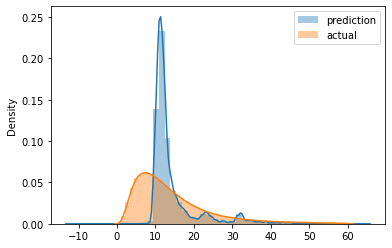

In [47]:
sns.distplot(y_pred, label="prediction")
sns.distplot(Y_train, label="actual")

plt.legend()

Now, let's calculate the Root Mean Square error (RMSE) on the training dataset

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
rmse = mean_squared_error(Y_train, y_pred, squared=False)

/home/suman/anaconda3/envs/datatalks/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [75]:
rmse

7.649261105445103

### Q5. What's the RMSE on train?

The RMSE on the training dataset is **7.649 minute**, which is quite good for the base model.

## Evaluate the model 

now let's use this model in the validation dataset i.e feb_dataset, to see how well it performs on unseen dataset.

In [80]:
# calculate duration in feb dataset
feb_dataset["duration"] = (feb_dataset.tpep_dropoff_datetime - feb_dataset.tpep_pickup_datetime).apply(lambda x: x.seconds/60)

feb_dataset.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'duration'],
      dtype='object')

In [81]:
# removing outliers
feb_dataset = feb_dataset[((feb_dataset.duration >= lower_bound) & (feb_dataset.duration <= upper_bound))]

In [82]:
# convert DOLocation and PULocation ID to string
feb_dataset["DOLocationID"] = feb_dataset.DOLocationID.astype("str")
feb_dataset["PULocationID"] = feb_dataset.PULocationID.astype("str")

In [83]:
feb_dataset_dict = feb_dataset[independent_variable].to_dict(orient="records")
feb_dataset_dict[:10]

[{'PULocationID': '142', 'DOLocationID': '163'},
 {'PULocationID': '132', 'DOLocationID': '26'},
 {'PULocationID': '161', 'DOLocationID': '145'},
 {'PULocationID': '148', 'DOLocationID': '236'},
 {'PULocationID': '137', 'DOLocationID': '244'},
 {'PULocationID': '263', 'DOLocationID': '141'},
 {'PULocationID': '48', 'DOLocationID': '243'},
 {'PULocationID': '114', 'DOLocationID': '211'},
 {'PULocationID': '114', 'DOLocationID': '249'},
 {'PULocationID': '125', 'DOLocationID': '107'}]

In [88]:
X_valid = dict_vectorizer.transform(feb_dataset_dict)
y_valid = feb_dataset[target_variable].values

In [89]:
print("X validation shape: ", X_valid.shape)
print("Y validaion shape: ", y_valid.shape)

X validation shape:  (2855951, 515)
Y validaion shape:  (2855951, 1)


In [90]:
y_valid_pred = model.predict(X_valid)

In [91]:
rmse = mean_squared_error(y_valid, y_valid_pred, squared=False)
rmse

/home/suman/anaconda3/envs/datatalks/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.8118203214414725

### Q6. What's the RMSE on validation?

The RMSE on validation dataset is **7.81** min.